<a href="https://colab.research.google.com/github/FaiqPrasetya/pvck-tugas/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Histogram Citra

<BarContainer object of 256 artists>

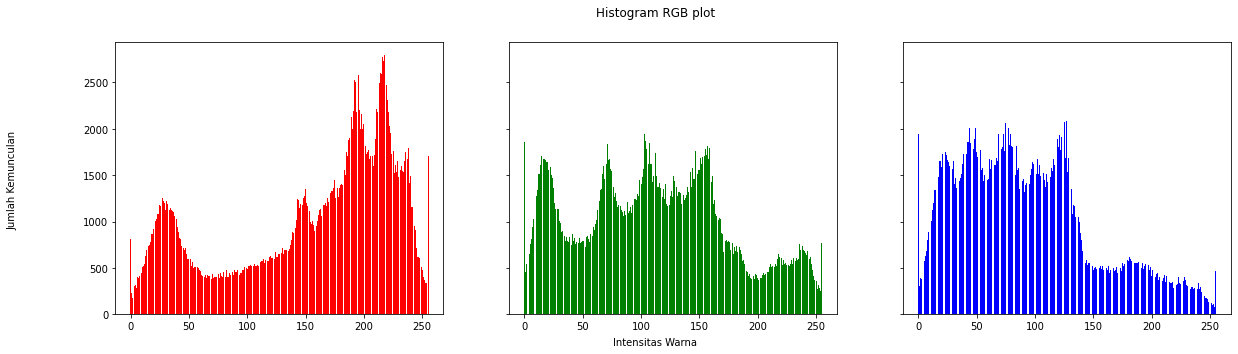

In [24]:
img_bgr = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 6/images/lena.jpg') # Read Image
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # Convert BGR to RGB
height, width, depth = np.shape(img_rgb) # Variabel height, width, dan depth. Digunakan pada looping
histogram = np.arange(256) # Pembuatan range dari yang berhenti di nilai 256

# Inisialisasi Variabel Histogram
red = [0] * 256
green = [0] * 256
blue = [0] * 256

# Looping untuk memeriksa pixel += 1
for y in range(0, height):
  for x in range(0, width):
    red[img_rgb[y][x][0]] += 1
    green[img_rgb[y][x][1]] += 1
    blue[img_rgb[y][x][2]] += 1

# Pembuatan Histogram
fig, axs = plt.subplots(1, 3, figsize = [20, 5], sharex = True, sharey = True) 
fig.suptitle('Histogram RGB plot') # Judul
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va = 'center', rotation = 'vertical') # Sumbu y
fig.text(0.5, 0.04, 'Intensitas Warna', ha = 'center') # Sumbu x

# Output Histogram
axs[0].bar(histogram, red, color='red')
axs[1].bar(histogram, green, color='green')
axs[2].bar(histogram, blue, color='blue')

## 4. Histogram NumPy

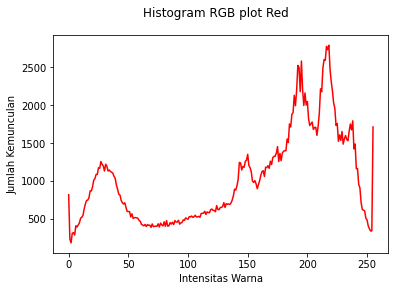

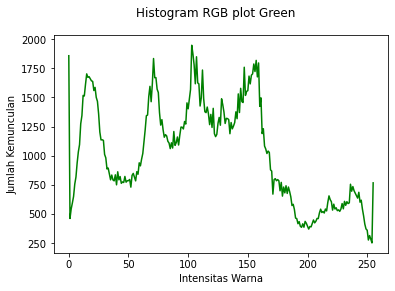

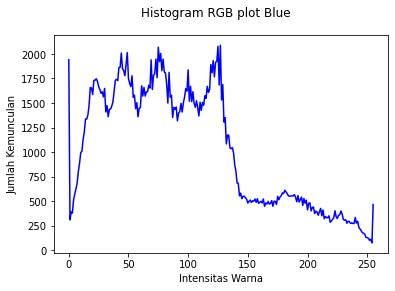

In [30]:
img_bgr = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 6/images/lena.jpg') # Read Image
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # Convert BGR to RGB

# Penggunaan np.histogram dari NumPy
red, bins = np.histogram(img_rgb[:, :, 0], bins = 256, range = (0, 256))
green, bins = np.histogram(img_rgb[:, :, 1], bins = 256, range = (0, 256))
blue, bins = np.histogram(img_rgb[:, :, 2], bins = 256, range = (0, 256))

# Histogram R
plt.suptitle('Histogram RGB plot Red')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(bins[0: -1], red, color = "r")
plt.show()

# Histogram G
plt.suptitle('Histogram RGB plot Green')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(bins[0 : -1], green, color = "g")
plt.show()

# Histogram B
plt.suptitle('Histogram RGB plot Blue')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(bins[0 : -1], blue, color = "b")
plt.show()

## 6. Histogram Equalization

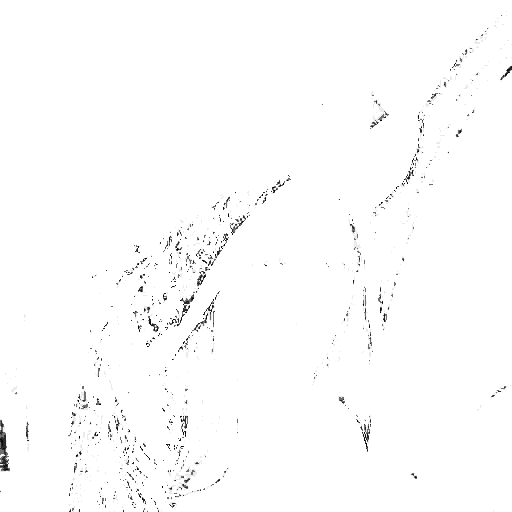

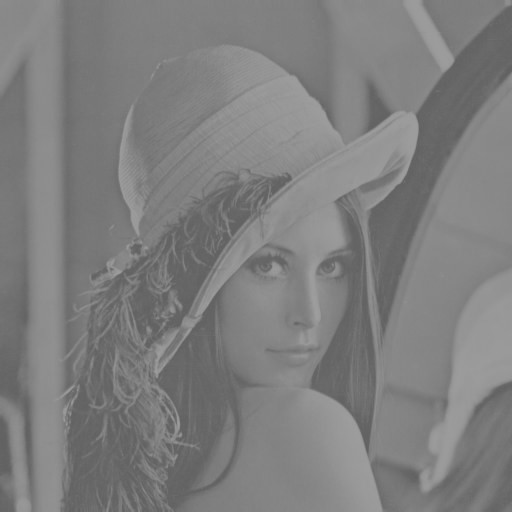

In [6]:
# Load image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 6/images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Calculate histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Apply equalization
img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape)

# Save output
# cv.imwrite('output.jpg', img_equalized)

# Output image
#final_frame = cv.hconcat((img, img_equalized))
cv2_imshow(img_equalized)
cv2_imshow(img)